Hi everyone! So today I'm mainly going to be focusing on the differences between people who have taken the vaccine and people who have no taken the vaccine. We can get a fairly good idea of how effective the vaccine is by the amount of people who have had severe cases or died with the vaccine vs the amount of people who didn't take the vaccine.

Vaccinated:

- Those who received two or three doses of vaccine and it has been a week since receiving the last dose (two weeks in Moderna vaccines) but less than half a year has passed since
- Those who recovered and subsequently received at least one vaccine dose and one week has passed since receiving the dose (two weeks with modern vaccines)
- Those who received at least one vaccine dose and then contracted and recovered


Invalid vaccinated - those who have received two doses of vaccine and have passed more than half a year and a week since receiving the last dose (half a year and two weeks in modern vaccines) and have not received another dose.

Unvaccinated - Those who have not received a first vaccine.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
from plotly.offline import plot, iplot
import plotly.express as px 

In [3]:
df_case = pd.read_csv('New Cases - vaccination.csv')
df_death = pd.read_csv('New Death - vaccination.csv')
df_sev = pd.read_csv('Severe Cases - vaccination.csv')
df_cumulative = pd.read_csv('Culmulativ pecentage of vaccines.csv')
df_cumulative.tail(1)

,Date,Vaccinated firs dose,Vaccinated second dose,Vaccinated third dose,Percentage of vaccinated first dose,Percentage of vaccinated second dose,Percentage of vaccinated third dose
325,09-11-2021,6250208,5746166,3996567,67.21,61.79,42.98


So just looking at the total right now it seems that by by September 11 of 2021 (last recorded day for this dataset) about 67% of Israelis recieved their first vaccine, 61% recieved their second, and 43% have recieved a third.

One thing to note is that the New Cases, New Deaths, and Severe Cases csv have about the same dates given. We can combine these three csv files for ease of use.

In [4]:
df = df_case.merge(df_death, on = ['Date', 'age group'])
df = df.merge(df_sev, on = ['Date', 'age group'])
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,age group,New cases vaccinated,New cases expired Vaccination,New cases Not vaccinated,New cases vaccinated per 100k,New cases expired Vaccination per 100k,New cases Not vaccinated per 100k,New Death vaccinated,New Death expired Vaccination,...,Severe cases Not vaccinated,Severe cases vaccinated per 100k,Severe cases expired Vaccination per 100k,Severe cases Not vaccinated per 100k,New Severe cases vaccinated,New severe cases expired Vaccination,New severe cases Not vaccinated,New severe cases vaccinated per 100k,New severe cases expired Vaccination per 100k,New severe cases Not vaccinated per 100k
0,2021-01-17,60+,0,0,243,0.0,0.0,51.4,0,0,...,555,0.0,0.0,117.4,0,0,58,0.0,0.0,12.3
1,2021-01-17,All population,1,0,4729,3.9,0.0,66.3,0,0,...,805,0.0,0.0,11.3,0,0,94,0.0,0.0,1.3
2,2021-01-17,0-59,1,0,4450,6.4,0.0,66.9,0,0,...,250,0.0,0.0,3.8,0,0,36,0.0,0.0,0.5
3,2021-01-18,All population,6,0,8738,13.2,0.0,123.8,0,0,...,792,2.2,0.0,11.2,1,0,99,2.2,0.0,1.4
4,2021-01-18,0-59,2,0,8309,7.9,0.0,126.0,0,0,...,235,0.0,0.0,3.6,0,0,33,0.0,0.0,0.5


In [5]:
df.shape

(885, 26)

First let's just take a look at the total amount of cases and deaths in fully vaccinated vs. somewhat vaccinated vs not vaccinated

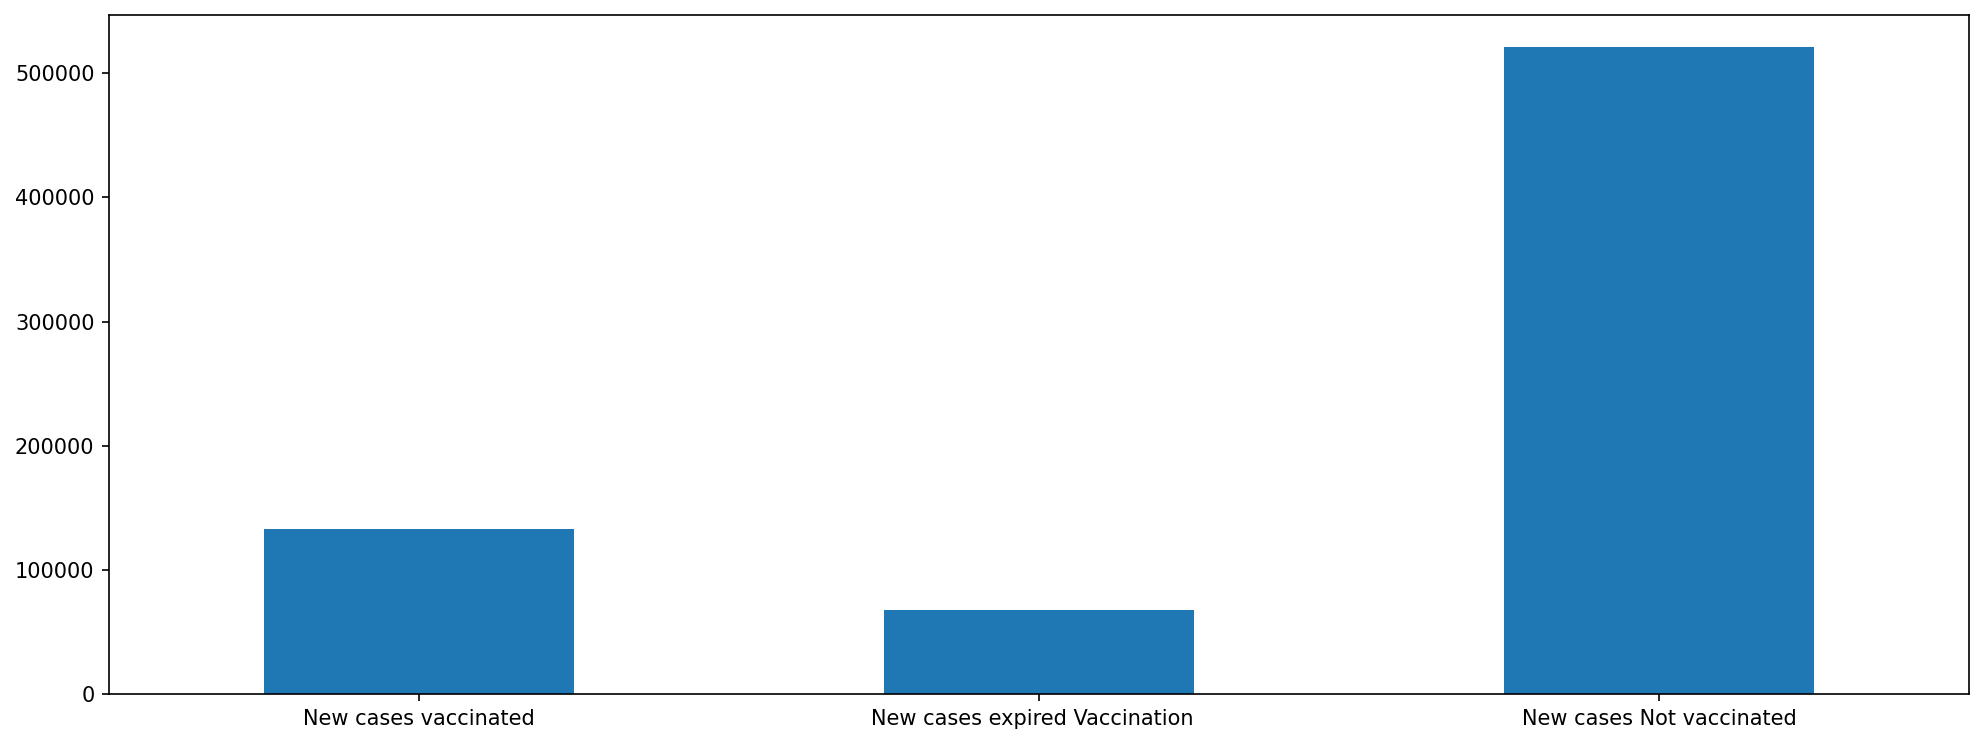

In [6]:
df_tot_cases = df[df['age group'] == 'All population'][['New cases vaccinated', 'New cases expired Vaccination  ', 'New cases Not vaccinated' ]].sum()
plt.figure(figsize = (16, 6), dpi = 150)
df_tot_cases.plot(kind = 'bar')
plt.xticks(rotation = 0);

So looking at the amount of cases in individuals we can clearly see that there are significantly more cases in people who are unvaccinated vs those who are. One interesting thing to note though is that there seems to be less cases among those fully vaccinared compared to those who have some vaccination.

The reason for this actually lies in the definition of vaccinated people. A vaccinated person counts as someone who recieved one or more doses but then got Covid. This means that someone who recieved just one dose but then got Covid is considered fully vaccinated and will be counted in the fully vaccinated people that got Covid section. I'm not sure about this, but it could also apply to people who got Covid and then got the vaccine afterwards, they may have also been put in the new cases for fully vaccinated people section.

Another reason could also be because lots of people (43%) are considered fully vaccinated and most of the rest are not vaccinated at all. There are only about 18% of people that didn't get the third dose and even then we have to remember that if they got the first 2 doses and it has been less than a half a year, they previously had Covid, or they got Covid after the vaccine, then they are still considered "fully vaccinated". 

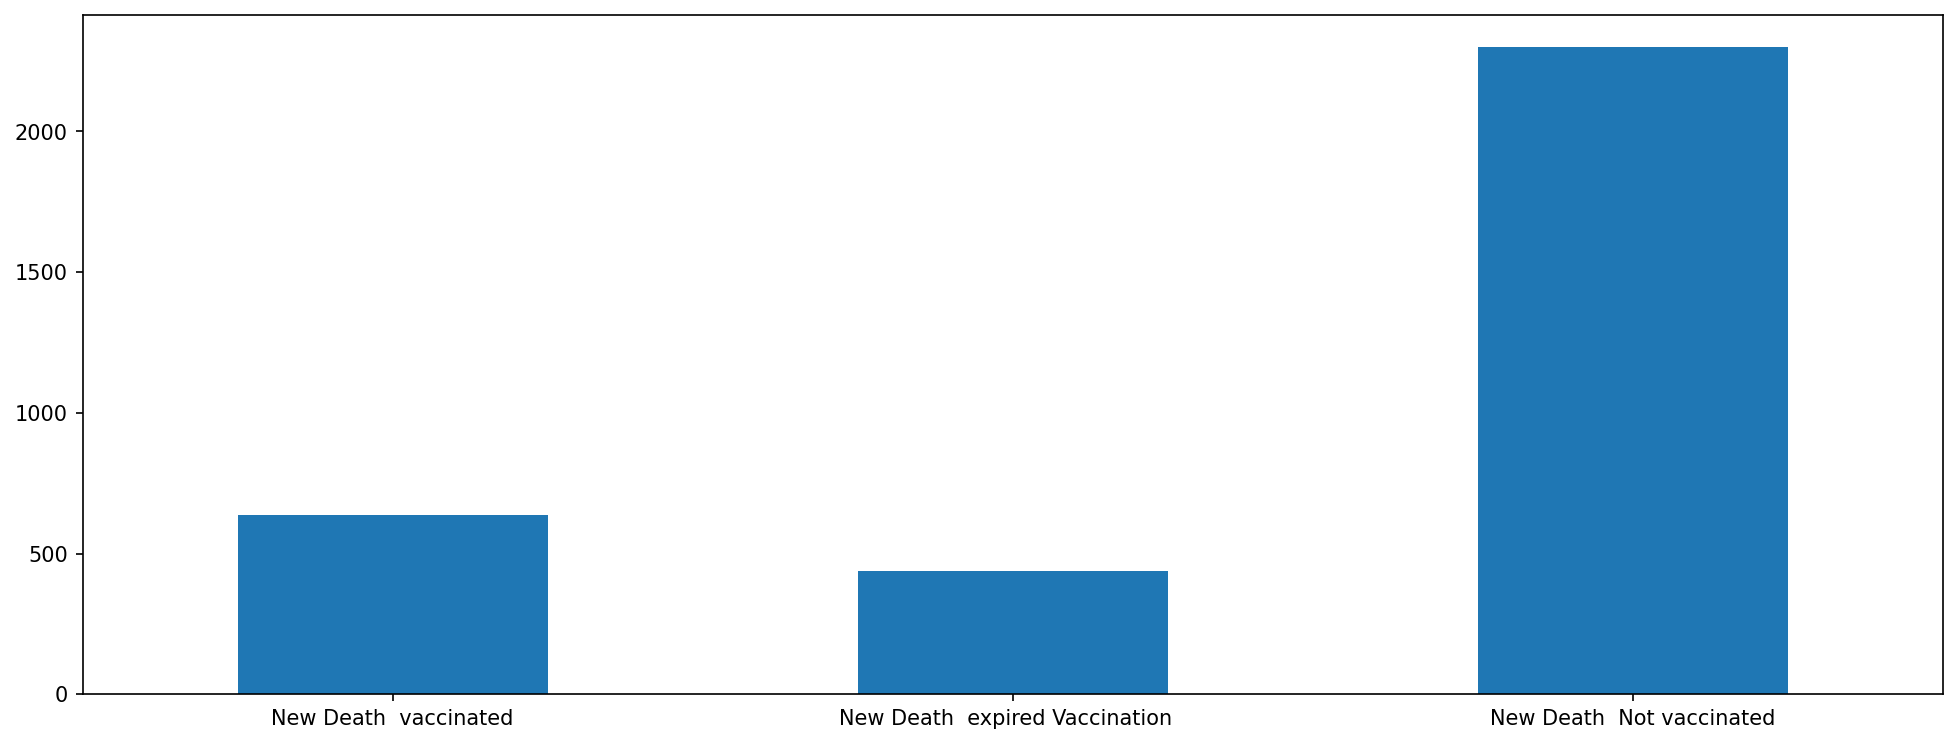

In [7]:
df_tot_death = df[df['age group'] == 'All population'][['New Death  vaccinated', 'New Death  expired Vaccination  ', 'New Death  Not vaccinated']].sum()
plt.figure(figsize = (16, 6), dpi = 150)
df_tot_death.plot(kind = 'bar')
plt.xticks(rotation = 0);

There appears to be the same trend with deaths as there was with cases. Around 19% of all people in Israel who have died from Covid were considered to be fully vaccinated which is a lot more than expected. Most news channels advertise that less than 1% of people who have died from Covid had the vaccine, 19% is a significantly higher amount. 

I am kind of curious though, if someone recieved one vaccination and then died of Covid which section would they be put in? In fact where would someone who only recieved one vaccine be put in the first place? The Invalid vaccinated section is still for people with 2 doses but it can't be the unvaccinated section because the definition is that they have not even recieved the first vaccine.

Now let's take a closer look at the age group of those who have had Covid to see how effective the vaccine is among younger and older people.

In [8]:
df_ca = df[df['age group'] != 'All population'].groupby('age group')[['New cases vaccinated', 'New cases expired Vaccination  ', 'New cases Not vaccinated' ]].sum()
df_ca

,New cases vaccinated,New cases expired Vaccination,New cases Not vaccinated
age group,,,
0-59,114955,57577,498814
60+,17960,9973,17747


In [9]:
melted_df = df_ca.reset_index().melt(var_name = 'New Cases', value_name = 'Amount', id_vars = 'age group')
melted_df

,age group,New Cases,Amount
0,0-59,New cases vaccinated,114955
1,60+,New cases vaccinated,17960
2,0-59,New cases expired Vaccination,57577
3,60+,New cases expired Vaccination,9973
4,0-59,New cases Not vaccinated,498814
5,60+,New cases Not vaccinated,17747


<AxesSubplot:xlabel='New Cases', ylabel='Amount'>

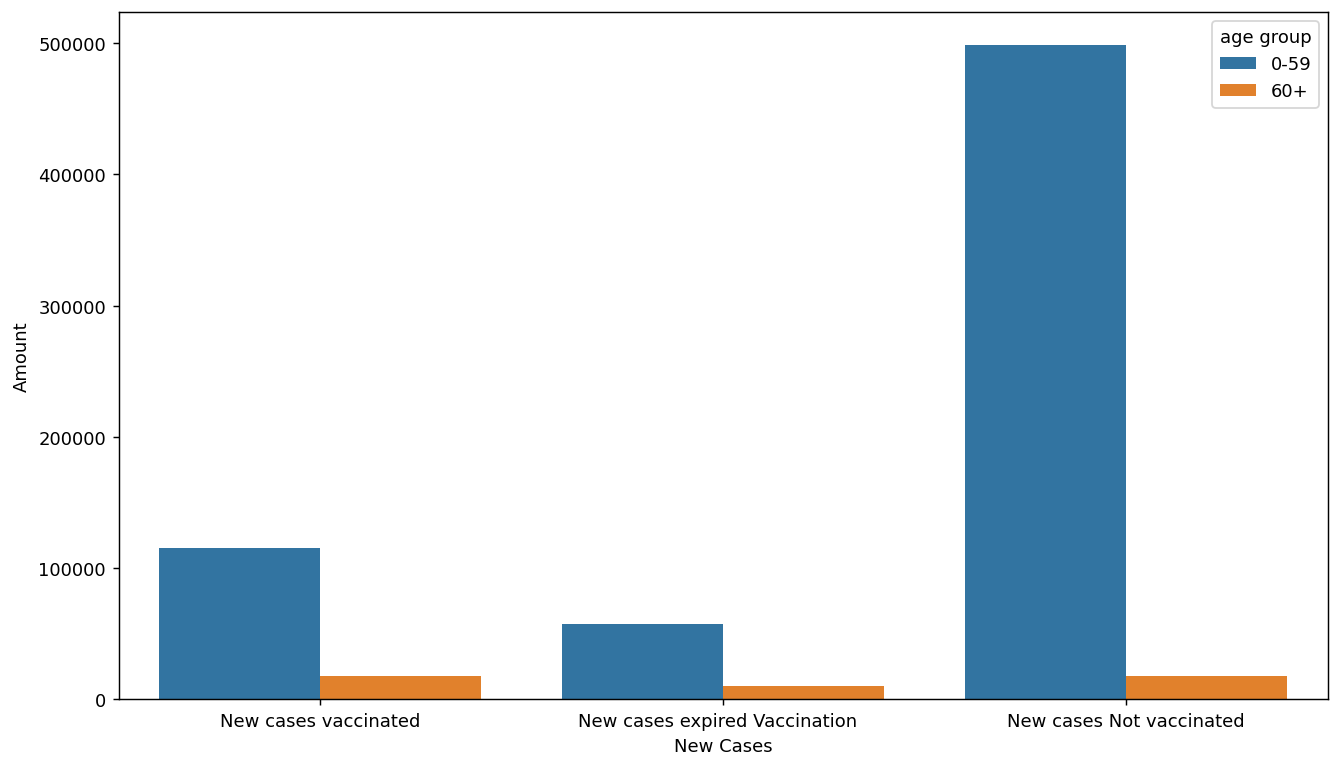

In [10]:
plt.figure(figsize = (12, 7), dpi = 130)
sns.barplot(data = melted_df, ci=False, x = 'New Cases', y = 'Amount', hue = 'age group')

There seems to be a lot of new cases in all groups among individuals under 60 years old. This kind of makes sense considering that younger people are a lot more active and not as worried about getting Covid than older people. Around 10.5% of Israel's population is over the age of 65 years old so most people who get Covid will tend to be younger. 

Still, we can clearly see that people who have not had the vaccine are significantly more likely to have a Covid case than those who are vaccinated.

One quick tip if you are doing this dataset so you don't make the same mistake I did. For severe cases there is a severe case for vaccinated, expired vaccinated, and unvaccinated. However, these are not actually the new cases of severe Covid so you'll notice that there are actually more severe covid cases than new covid cases in this group. To get the new severe covid cases, there are other columns titled "new severe case vaccinated" and the rest also have "new" in them.

<AxesSubplot:xlabel='Severe Cases', ylabel='Amount'>

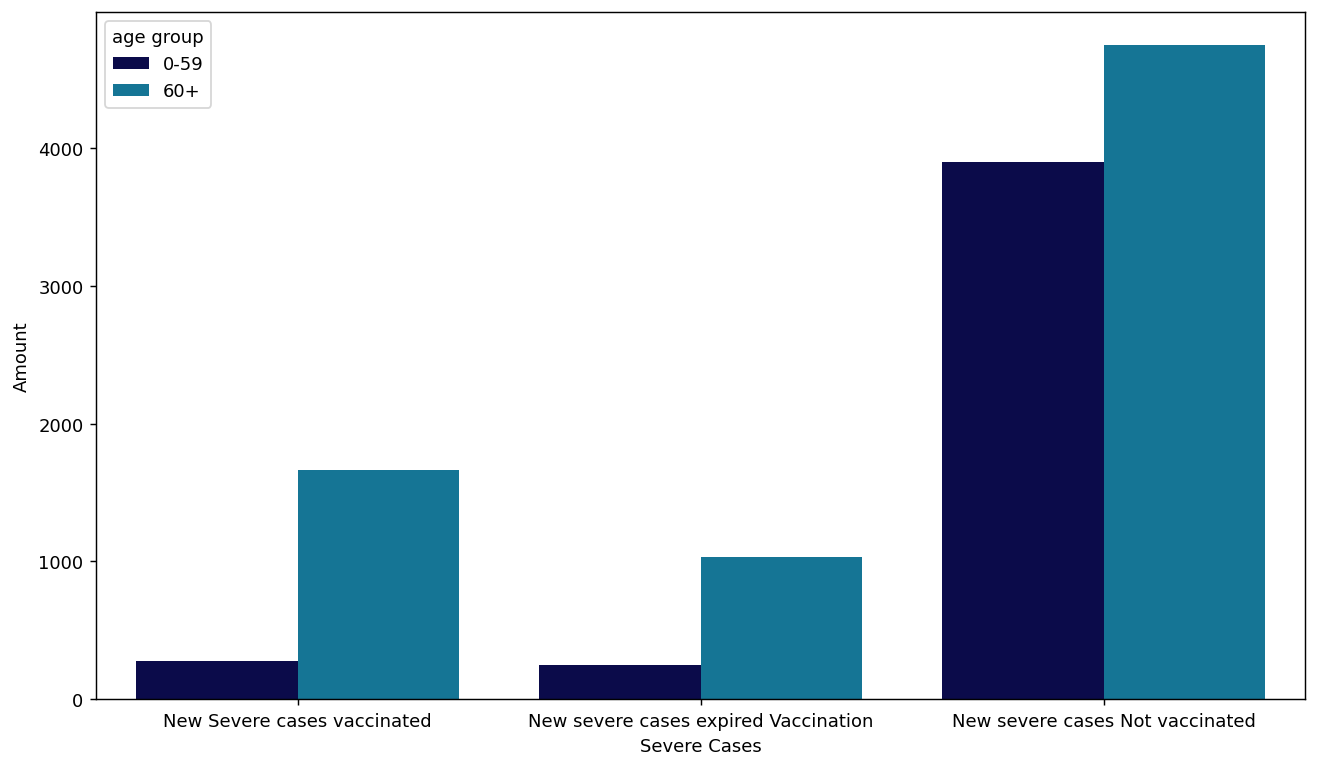

In [11]:
df_sev = df[df['age group'] != 'All population'].groupby('age group')[['New Severe cases vaccinated', 'New severe cases expired Vaccination', 'New severe cases Not vaccinated']].sum()
melted_df = df_sev.reset_index().melt(var_name = 'Severe Cases', value_name = 'Amount', id_vars = 'age group')
plt.figure(figsize = (12, 7), dpi = 130)
sns.barplot(data = melted_df, ci=False, x = 'Severe Cases', y = 'Amount', hue = 'age group', palette = 'ocean')

In [12]:
df[df['age group'] == '0-59']['New cases Not vaccinated'].sum()

498814

In [13]:
df[df['age group'] == '60+']['New severe cases Not vaccinated'].sum()

4752

In [14]:
df[df['age group'] == '60+']['New cases Not vaccinated'].sum()

17747

So as usual there are more severe cases among those who are older. However, as we can see people aged 0-59 years old who are not vaccinated are almost have the same amount of severe cases as those who are 60 and older. Now, one thing to consider is that most of the population is 0-59 years old so it makes sense that there are still a lot of severe cases in a younger but bigger population. Also, as we saw in the last graph, most people who get Covid are younger

Looking at the actual amount of severe cases though it seems pretty concerning. This data goes from January 17th 2021 to July 7 2021, in that time there were 17,747 new covid cases among those unvaccinated and aged 60+ in Israel. Given that there were 4,752 severe cases among those 60+, this means that 26.77% of those aged 60+ who were unvaccinated recieved severe side effects from Covid!

In [15]:
df_dead = df[['age group', 'New Death  vaccinated', 'New Death  expired Vaccination  ', 'New Death  Not vaccinated' ]]
df_dead = df_dead[df_dead['age group'] != 'All population'].groupby('age group').sum()
df_dead = df_dead.reset_index().melt(var_name = 'Deaths', value_name = 'Amount', id_vars = 'age group')
df_dead

,age group,Deaths,Amount
0,0-59,New Death vaccinated,22
1,60+,New Death vaccinated,616
2,0-59,New Death expired Vaccination,28
3,60+,New Death expired Vaccination,411
4,0-59,New Death Not vaccinated,351
5,60+,New Death Not vaccinated,1946


<AxesSubplot:xlabel='Deaths', ylabel='Amount'>

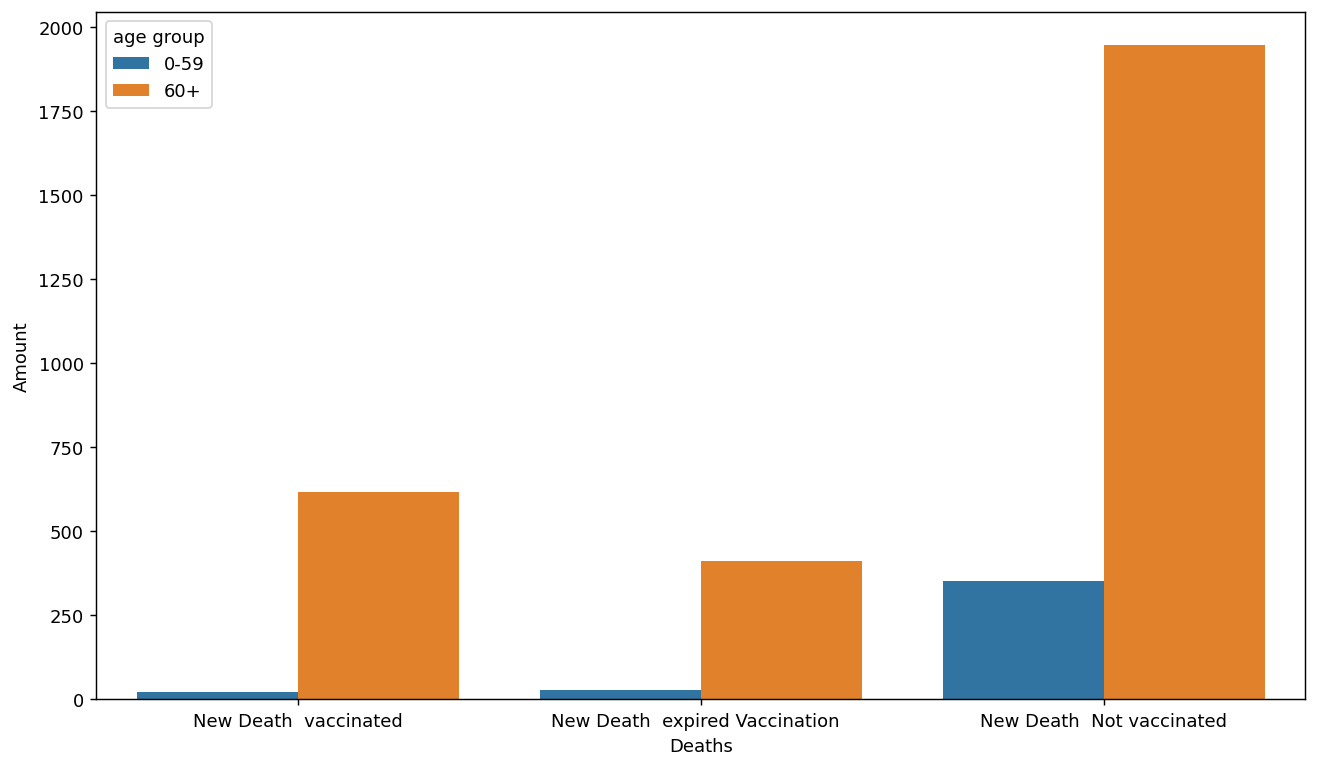

In [16]:
plt.figure(figsize = (12, 7), dpi = 130)
sns.barplot(data = df_dead, x = 'Deaths', y = 'Amount', hue = 'age group', ci = False)

So again we see the same trend as was for the severe cases. Older people have a significantly higher chance of dying from Covid, however, if they are unvaccinated than the chance of dying from Covid significantly increases especially among the older population.

Alright now lets put all our data together and get a good idea of the trend in all age groups

In [17]:
df_all = df[['age group', 'New cases vaccinated', 'New cases expired Vaccination  ', 'New cases Not vaccinated', 'New Severe cases vaccinated', 'New severe cases expired Vaccination', 'New severe cases Not vaccinated', 'New Death  vaccinated', 'New Death  expired Vaccination  ', 'New Death  Not vaccinated'  ]]
df_all = df_all[df_all['age group'] != 'All population'].groupby('age group').sum().reset_index()
df_all = df_all.melt(var_name = 'Effectiveness', value_name = 'Amount', id_vars = 'age group')
px.bar(data_frame = df_all, x = 'Effectiveness', y = 'Amount', color = 'age group', barmode = 'group', height = 1000)

In [18]:
df_all

,age group,Effectiveness,Amount
0,0-59,New cases vaccinated,114955
1,60+,New cases vaccinated,17960
2,0-59,New cases expired Vaccination,57577
3,60+,New cases expired Vaccination,9973
4,0-59,New cases Not vaccinated,498814
5,60+,New cases Not vaccinated,17747
6,0-59,New Severe cases vaccinated,277
7,60+,New Severe cases vaccinated,1664
8,0-59,New severe cases expired Vaccination,250
9,60+,New severe cases expired Vaccination,1035
